In [ ]:
# ! pip install -U git+https://github.com/huggingface/transformers.git
# ! pip install -U git+https://github.com/huggingface/accelerate.git

In [1]:
import pandas as pd

In [3]:
train_data = pd.read_csv("/kaggle/input/glue-dataset/sst2_train.csv",error_bad_lines=False, engine="python")
test_data=pd.read_csv("/kaggle/input/glue-dataset/sst2_validation.csv",error_bad_lines=False , engine="python")
train_data.head()
# test_data.head()

/tmp/ipykernel_140/2070266980.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_data = pd.read_csv("/kaggle/input/glue-dataset/sst2_train.csv",error_bad_lines=False, engine="python")
/tmp/ipykernel_140/2070266980.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_data=pd.read_csv("/kaggle/input/glue-dataset/sst2_validation.csv",error_bad_lines=False , engine="python")


,sentence,label,idx
0,hide new secretions from the parental units,0,0
1,"contains no wit , only labored gags",0,1
2,that loves its characters and communicates som...,1,2
3,remains utterly satisfied to remain the same t...,0,3
4,on the worst revenge-of-the-nerds clichés the ...,0,4


In [ ]:
train_data["sentence"].value_counts()

In [4]:
train_data=train_data[["sentence","label"]]

test_data=test_data[["sentence","label"]]
test_data.head()

,sentence,label
0,it 's a charming and often affecting journey .,1
1,unflinchingly bleak and desperate,0
2,allows us to hope that nolan is poised to emba...,1
3,"the acting , costumes , music , cinematography...",1
4,"it 's slow -- very , very slow .",0


In [27]:
x_test=test_data["sentence"]
y_test=test_data["label"]

**data vizualization
**

In [101]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

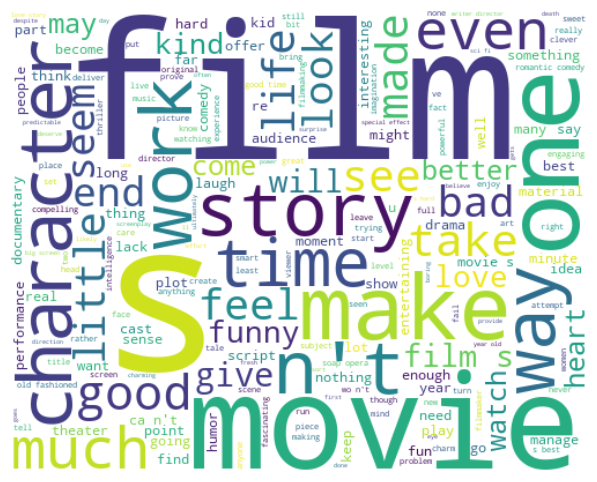

In [102]:
# Load the SST-2 dataset
df = pd.read_csv('/kaggle/input/glue-dataset/sst2_train.csv')

# =cancating all the sentence in the dataset
all_text = ' '.join(df['sentence'])

# create the image
wordcloud = WordCloud(width=500, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
# Load the SST-2 dataset
df = pd.read_csv('/kaggle/input/glue-dataset/sst2_train.csv')

# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a scatterplot
plt.figure(figsize=(15, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=df['label'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SST-2 Dataset Scatterplot')
plt.colorbar()
plt.show()

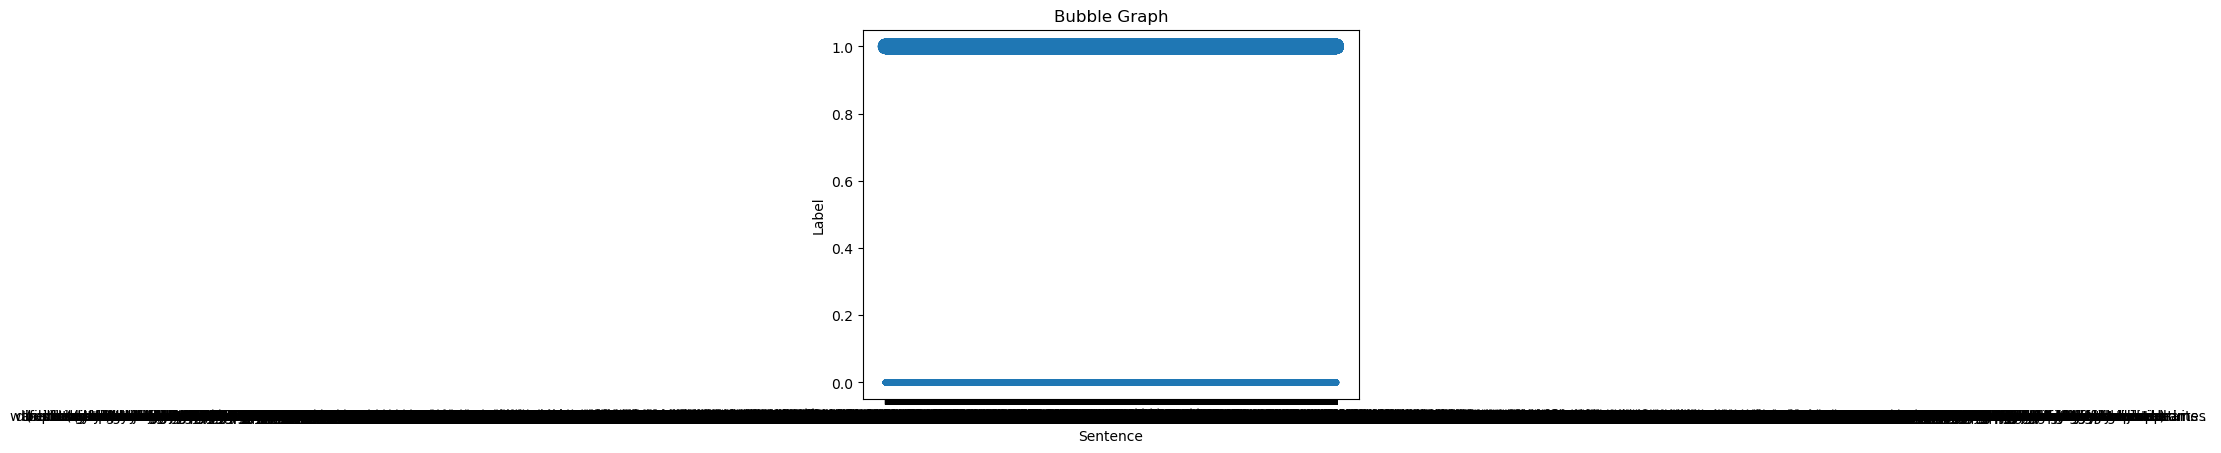

In [105]:
# import matplotlib.pyplot as plt

# # Set the size of the bubbles
# min_size = 10
# max_size = 100

# # Create the bubble graph
# plt.scatter(train_data["sentence"], train_data["label"], s=train_data["label"] * (max_size - min_size) + min_size)

# # Set labels and title
# plt.xlabel("Sentence")
# plt.ylabel("Label")
# plt.title("Bubble Graph")

# # Show the plot
# plt.show()

In [ ]:
#showing the no of labels in the dataset

# Load the dataset
df = pd.read_csv("/kaggle/input/nli-dataset-for-sentence-understanding/sst2_train.csv")

# Count the number of unique labels
label_counts = df["label"].value_counts()

# Plot the graph
plt.figure(figsize=(6,7))
plt.bar(label_counts.index, label_counts.values,color=["black","brown"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Labels in Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.style.use('ggplot')
df = pd.read_csv("/kaggle/input/nli-dataset-for-sentence-understanding/sst2_train.csv")
label_counts = df["label"].value_counts()
ax=df["label"].value_counts().sort_index().plot(kind="bar",
                        title="no of sentiments",figsize=(6,7),
                        color=["red","green"])
ax.set_xlabel("sentence")
ax.set_ylabel("no of sentence")
plt.show()

**training of the data**

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [8]:
model=model.to('cuda')

In [ ]:
sample_data = ["I am eating","I am playing "]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

In [9]:
X_train = list(train_data["sentence"])
y_train = list(train_data["label"])

X_val =list(test_data["sentence"])
y_val =list(test_data["label"])
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

In [ ]:
print(X_train_tokenized['attention_mask'][0])
     

In [ ]:
len(X_train),len(X_val)

In [10]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [11]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)
print("done")

done


In [ ]:
train_dataset[3]

In [85]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)
    cm = confusion_matrix(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1,"pred":pred,"conf":cm}

In [86]:
# Define Trainer
args = TrainingArguments(
    output_dir="/kaggle/working/output",
    num_train_epochs=1,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [79]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
500,0.098400
1000,0.115600
1500,0.193700
2000,0.167100
2500,0.162500
3000,0.157600
3500,0.147000
4000,0.151100


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=4210, training_loss=0.1489954325478887, metrics={'train_runtime': 926.5563, 'train_samples_per_second': 72.687, 'train_steps_per_second': 4.544, 'total_flos': 2284253099318520.0, 'train_loss': 0.1489954325478887, 'epoch': 1.0})

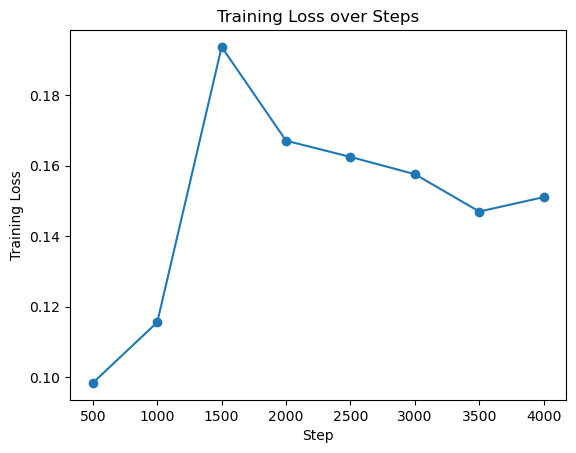

In [100]:
import matplotlib.pyplot as plt

steps = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
loss_values = [0.098400, 0.115600, 0.193700, 0.167100, 0.162500, 0.157600, 0.147000, 0.151100]

plt.plot(steps, loss_values, marker='o')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.title('Training Loss over Steps')
plt.show()

In [91]:
evaluation = trainer.predict(val_dataset)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


<class 'transformers.trainer_utils.EvalPrediction'>


In [ ]:
print(evaluation)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

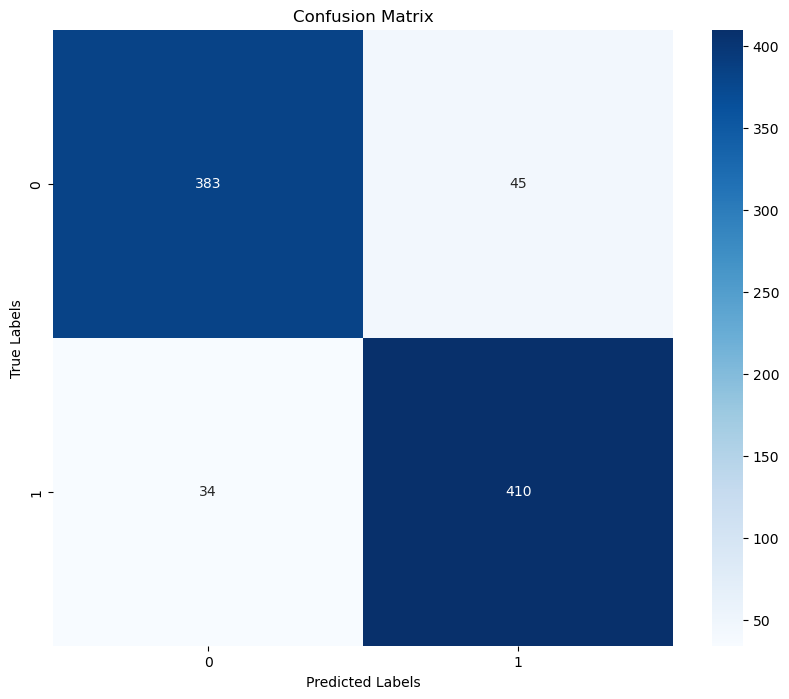

In [98]:
# Access the confusion matrix from the evaluation results
confusion_matrix = evaluation.metrics["test_conf"]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [18]:
trainer.save_model('CustomModel')

In [19]:
model_2 = BertForSequenceClassification.from_pretrained("CustomModel")
model_2.to('cuda')


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
text = "thats great but your not that great"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions